In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn import __version__
print("Scikit-learn", __version__, "should be >= 0.22")
import seaborn as sns

Scikit-learn 0.22 should be >= 0.22


https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

# SciPy

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

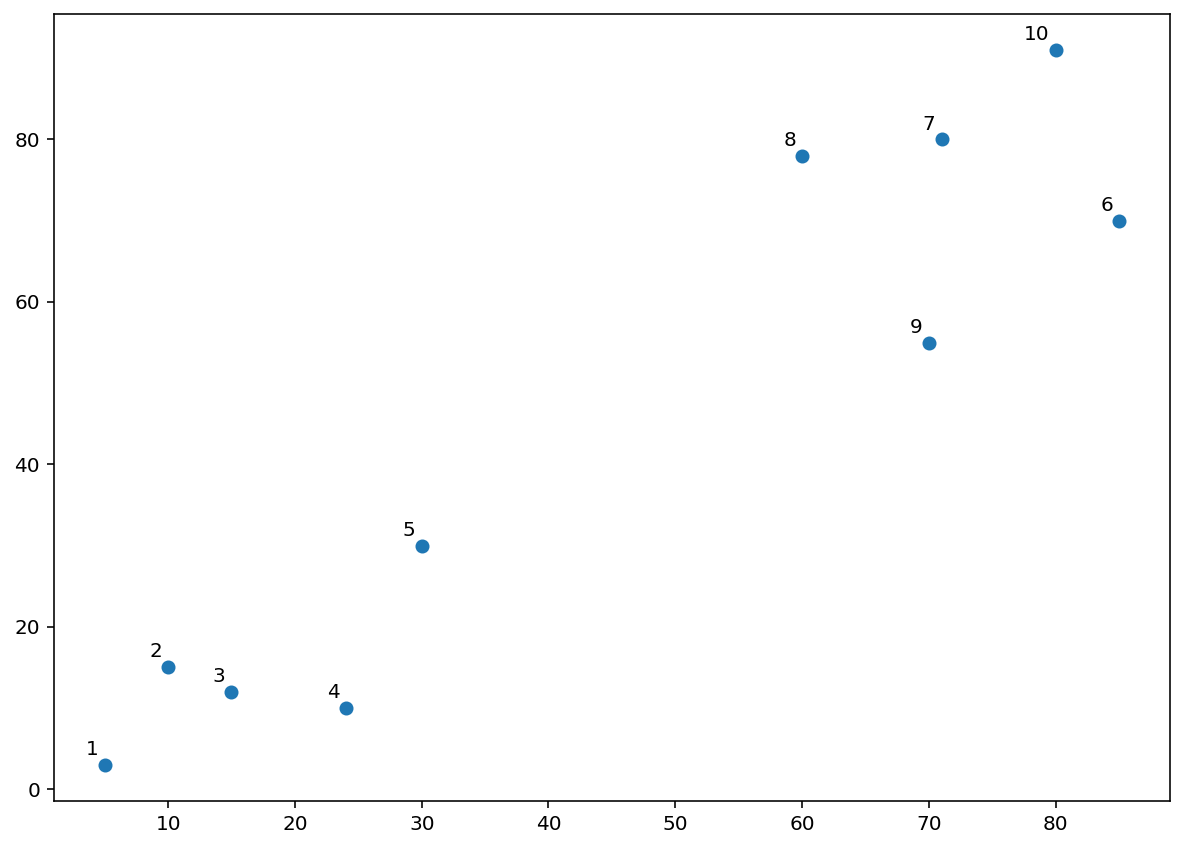

In [3]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [14.375, 14.375, 64.375, 64.375]],
 'dcoord': [[0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [0.0, 9.219544457292887, 9.219544457292887, 5.830951894845301],
  [0.0, 13.0, 13.0, 9.219544457292887],
  [0.0, 20.8806130178211, 20.8806130178211, 13.0],
  [0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [0.0, 14.212670403551895, 14.212670403551895, 11.180339887498949],
  [0.0, 17.204650534085253, 17.204650534085253, 14.212670403551895],
  [0.0, 21.213203435596427, 21.213203435596427, 17.204650534085253],
  [20.8806130178211,
   47.16990566028302,
   47.16990566028302,
   21.213203435596427]],
 'ivl': [5, 1, 4, 2, 3, 9, 6, 10, 7, 8],
 'leaves': [4, 0, 3, 1, 2, 8, 5, 9, 6, 7],
 'color_list': ['g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'b']}

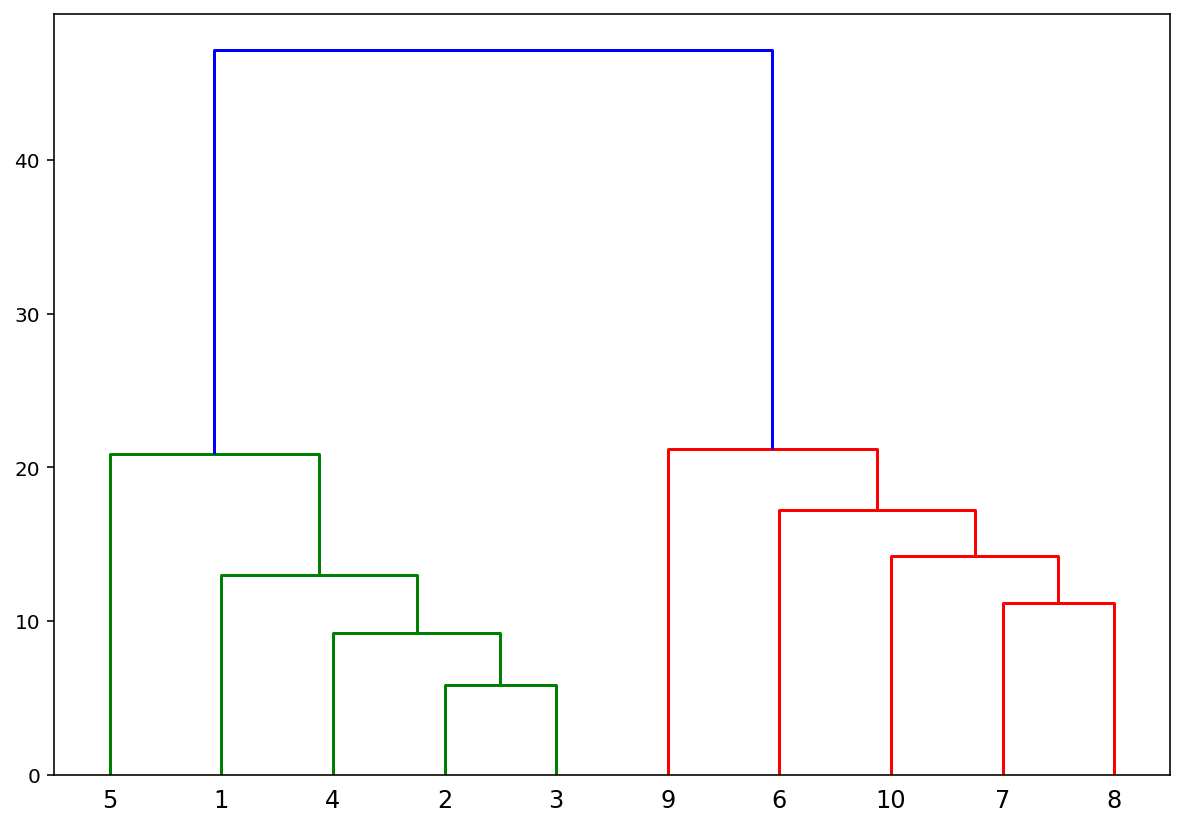

In [5]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

## Scikit-learn

In [8]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [10]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


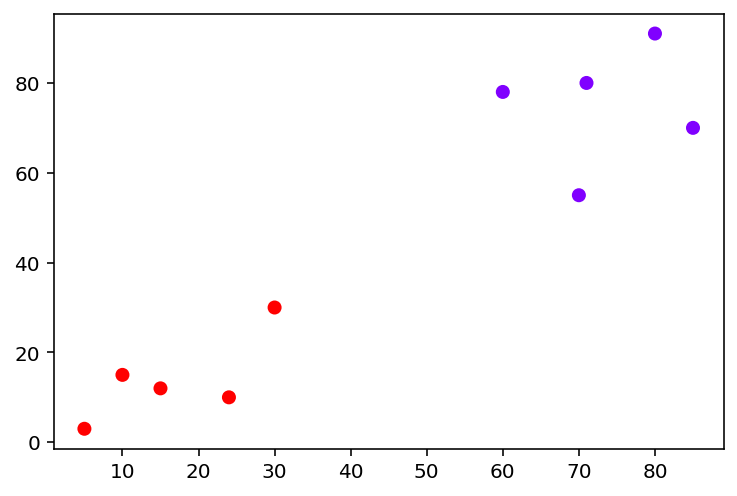

In [11]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## Images

In [2]:
from sklearn.datasets import load_digits

In [33]:
digits = load_digits()
X = digits.data
Y = digits.target

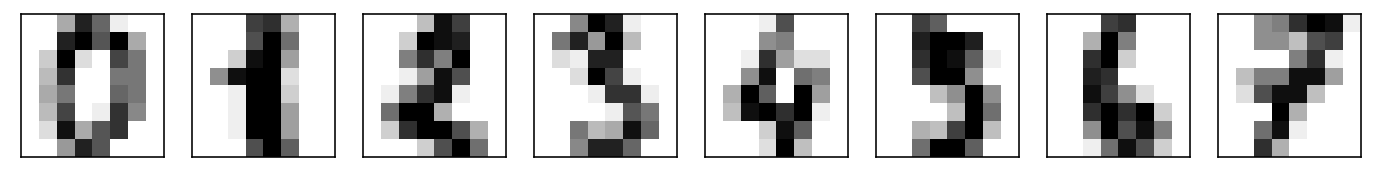

In [27]:
display = lambda im, ax: ax.imshow(im.reshape(8, 8), cmap='gray_r')
fig, axes = plt.subplots(1, 8, figsize=(12, 4), sharex=True, sharey=True)
for x, ax in zip(X, axes): display(x, ax)
ax.set(xticks=[], yticks=[]);

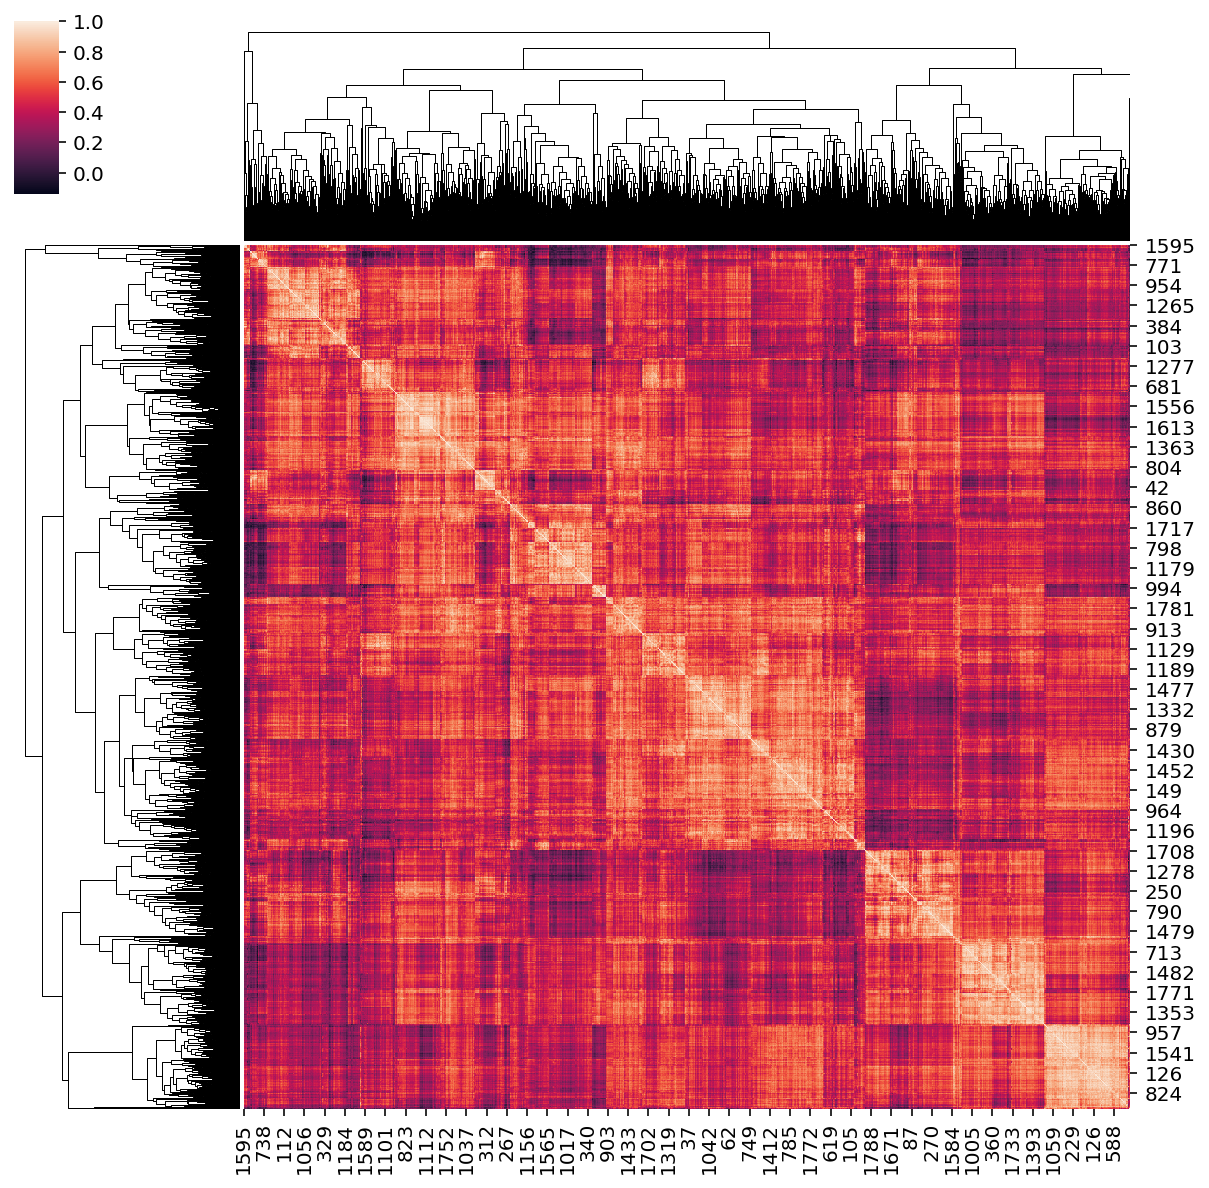

In [28]:
sns.clustermap(corr);

In [51]:
tsne = TSNE()
X_ = tsne.fit_transform(X)

In [73]:
model = AgglomerativeClustering(n_clusters=10)
Yhat = model.fit_predict(X)

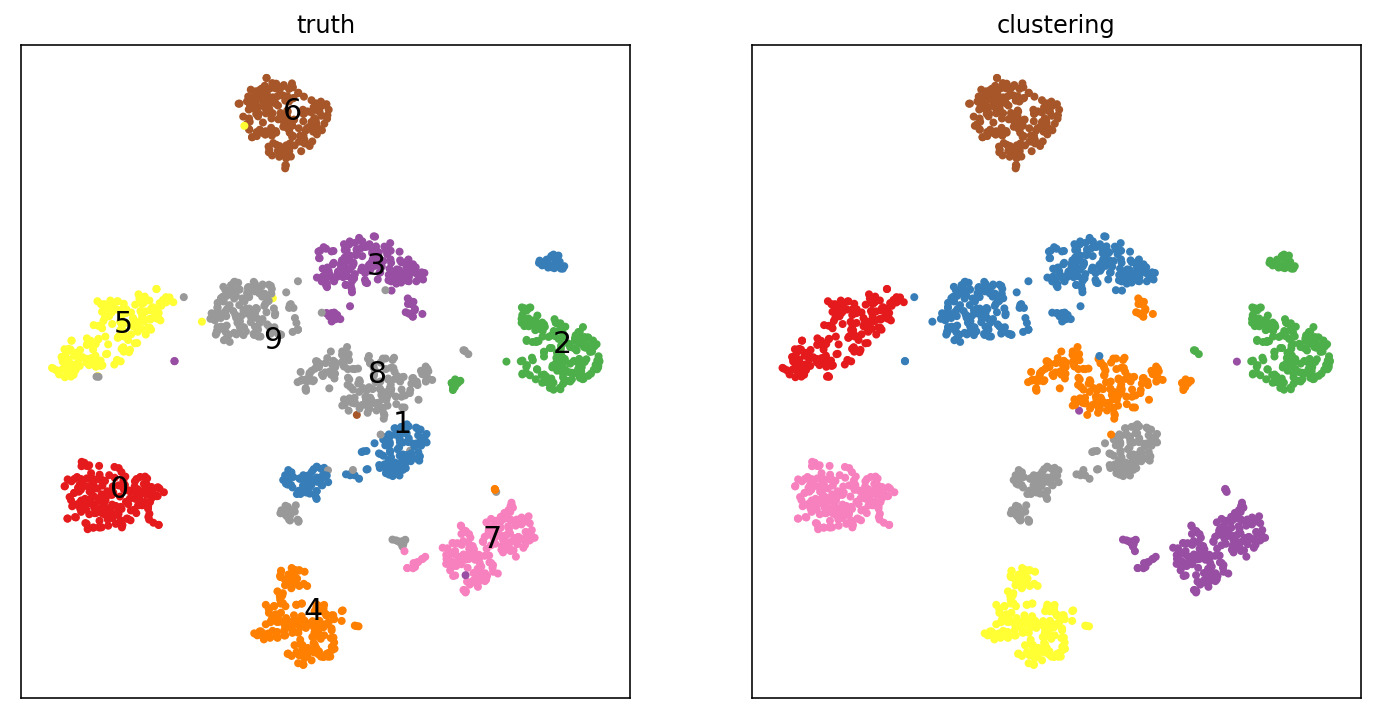

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.scatter(X_[:,0], X_[:,1], marker='.', c=Y, cmap='Set1')
for y in np.unique(Y):
    idx = Y==y
    x1, x2 = X_[idx].mean(axis=0)[:2]
    ax1.text(x1, x2, str(y), fontdict=dict(size=15))
ax2.scatter(X_[:,0], X_[:,1], marker='.', c=Yhat, cmap='Set1')
ax1.set(title='truth', xticks=[], yticks=[])
ax2.set(title='clustering', xticks=[], yticks=[]);